In [7]:
## Bibliotecas para tratamento de dados, plotting e leitura de arquivos de dados
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Geopandas: Utilizamos para conseguir ler arquivos do tipo Shape (.shp)
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
# from functions import *

In [8]:
def percentagem(t, x):
    return (x / t) * 100 if t > 0 else 0  # Evita divisão por zero

anos = [19, 20, 21, 22]  # Lista de anos (2019-2022)
vet = np.zeros((2, len(anos)))

# Dicionário para converter valores textuais em códigos numéricos
mapeamento_presenca = {
    "Presente": 0,
    "Faltou à prova": 1,
    "Eliminado": 2
}

for i, ano in enumerate(anos):
    caminho = f"E:/dataset/enem/microdados_enem_20{ano}/DADOS/dados_enem_20{ano}.csv"
    
    # Lendo apenas as colunas necessárias
    colunas = ['NU_ANO', 'TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC']
    dat = pd.read_csv(caminho, sep=';', usecols=colunas)

    # Converte colunas de presença de texto para números
    for col in ['TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC']:
        dat[col] = dat[col].map(mapeamento_presenca).fillna(0).astype(int)

    total = len(dat)  # Conta o total de inscritos

    # Contagem de faltosos por dia de prova (1 = faltou)
    primeiro = ((dat['TP_PRESENCA_CH'] == 1) | (dat['TP_PRESENCA_LC'] == 1)).sum()
    segundo = ((dat['TP_PRESENCA_CN'] == 1) | (dat['TP_PRESENCA_MT'] == 1)).sum()

    vet[0, i] = percentagem(total, primeiro)
    vet[1, i] = percentagem(total, segundo)

    del dat  # Libera memória após o uso

print(vet)  # Exibe a matriz final

[[22.92470655 52.30041488 29.71819842 28.1343918 ]
 [27.14185648 55.06109257 33.70488567 32.19502863]]


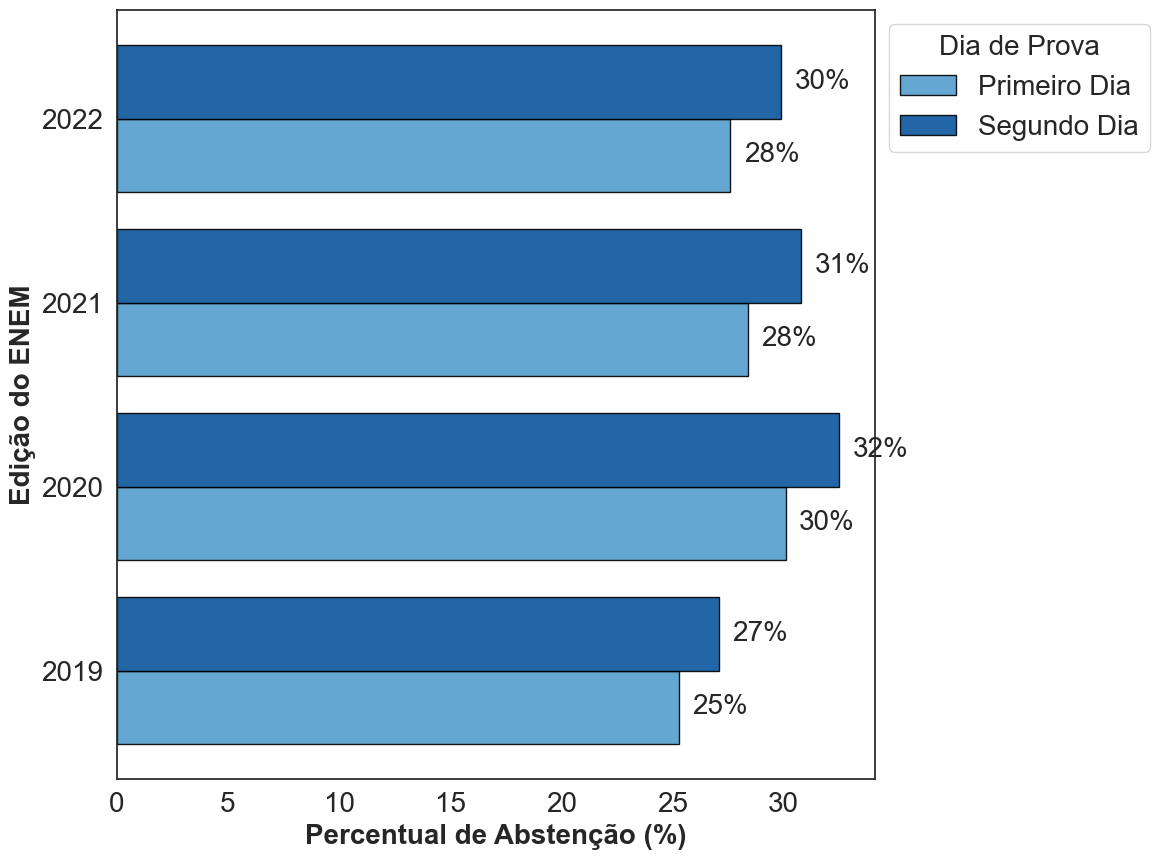

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Simulação de dados (substituir pelos valores reais se necessário)
vet = np.array([
    [25.3, 30.1, 28.4, 27.6],  # Primeiro dia
    [27.1, 32.5, 30.8, 29.9]   # Segundo dia
])

# Labels dos anos
labels = ['2019', '2020', '2021', '2022']
x = np.arange(len(labels))  # Posições das barras
width = 0.4  # Largura das barras

# Estilo profissional
sns.set_theme(style="white", font="serif")
plt.rcParams.update({"font.size": 20, "font.family": "Arial"})

# Criar figura
fig, ax = plt.subplots(figsize=(12, 9))

# Paleta de cores em tons de azul
cores = sns.color_palette("Blues", 6)

# Plotar as barras
ax.barh(x - width/2, vet[0], height=width, label='Primeiro Dia', color=cores[3], edgecolor='black', alpha=0.9)
ax.barh(x + width/2, vet[1], height=width, label='Segundo Dia', color=cores[5], edgecolor='black', alpha=0.9)

# Eixos e rótulos
ax.set_xlabel('Percentual de Abstenção (%)', fontsize=20, weight='bold')
ax.set_ylabel('Edição do ENEM', fontsize=20, weight='bold')
ax.set_yticks(x)
ax.set_yticklabels(labels, fontsize=20)
ax.tick_params(axis='x', labelsize=20)

# Rótulos nas barras
for i in range(len(labels)):
    ax.text(vet[0, i] + 0.6, i - width/2, f'{vet[0, i]:.0f}%', va='center', fontsize=20)
    ax.text(vet[1, i] + 0.6, i + width/2, f'{vet[1, i]:.0f}%', va='center', fontsize=20)

# Legenda à direita
ax.legend(
    title='Dia de Prova',
    title_fontsize=20,  # Tamanho da fonte do título da legenda
    loc='upper left',
    bbox_to_anchor=(1.0, 1.0),
    fontsize=20  # Tamanho da fonte dos itens da legenda
)


# Ajustar layout
plt.tight_layout()
plt.savefig("abstencao_enem.png", dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# Suponha que você já tenha:
# anos = ['19', '20', '21', '22']
# mapeamento_presenca = {0: 0, 1: 1, 2: 0, 3: 0}  # Exemplo
# percentagem = lambda total, presenca: 100 * (1 - presenca / total) if total else 0

co_uf = np.array([11, 12, 13, 14, 15, 16, 17, 21, 22, 23, 24, 25, 26, 27,
                  28, 29, 31, 32, 33, 35, 41, 42, 43, 50, 51, 52, 53])

n_anos = len(anos)
vet = np.zeros((len(co_uf), 1 + 2 * n_anos))  # 1 col. UF + n anos (1º dia) + n anos (2º dia)
vet[:, 0] = co_uf

for i, ano in enumerate(anos):
    print(f"Processando dados do ENEM {ano}...")
    caminho = f"E:/dataset/enem/microdados_enem_20{ano}/DADOS/dados_enem_20{ano}.csv"

    colunas = ['CO_UF_ESC', 'TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC']
    dat = pd.read_csv(caminho, sep=';', usecols=colunas)

    for col in ['TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC']:
        dat[col] = dat[col].map(mapeamento_presenca).fillna(0).astype(int)

    for j, uf in enumerate(co_uf):
        total = (dat['CO_UF_ESC'] == uf).sum()

        primeiro = ((dat['CO_UF_ESC'] == uf) &
                    ((dat['TP_PRESENCA_CH'] == 1) | (dat['TP_PRESENCA_LC'] == 1))).sum()
        segundo = ((dat['CO_UF_ESC'] == uf) &
                   ((dat['TP_PRESENCA_CN'] == 1) | (dat['TP_PRESENCA_MT'] == 1))).sum()

        vet[j, i + 1] = percentagem(total, primeiro)   # Primeiro dia
        vet[j, i + 1 + n_anos] = percentagem(total, segundo)  # Segundo dia

    del dat

print("Processamento concluído!")

Processando dados do ENEM 19...
Processando dados do ENEM 20...
Processando dados do ENEM 21...
Processando dados do ENEM 22...
Processamento concluído!


In [21]:
# Criando DataFrame com nomes de colunas mais organizados
colunas = [
    'CD_UF', 
    'First day - ENEM 2019', 'First day - ENEM 2020', 'First day - ENEM 2021', 'First day - ENEM 2022',
    'Second day - ENEM 2019', 'Second day - ENEM 2020', 'Second day - ENEM 2021', 'Second day - ENEM 2022'
]

df = pd.DataFrame(data=vet, columns=colunas)

# Convertendo a coluna 'CD_UF' para inteiro sem risco de erro
df['CD_UF'] = df['CD_UF'].map(int)

# Salvando o DataFrame em CSV com separação por vírgula e garantindo precisão nos números
df.to_csv('mapas/abstencao.csv', sep=',', index=False, float_format='%.2f')

print("Arquivo 'abstencao.csv' salvo com sucesso!")

Arquivo 'abstencao.csv' salvo com sucesso!


### Figura Abstenção por estados

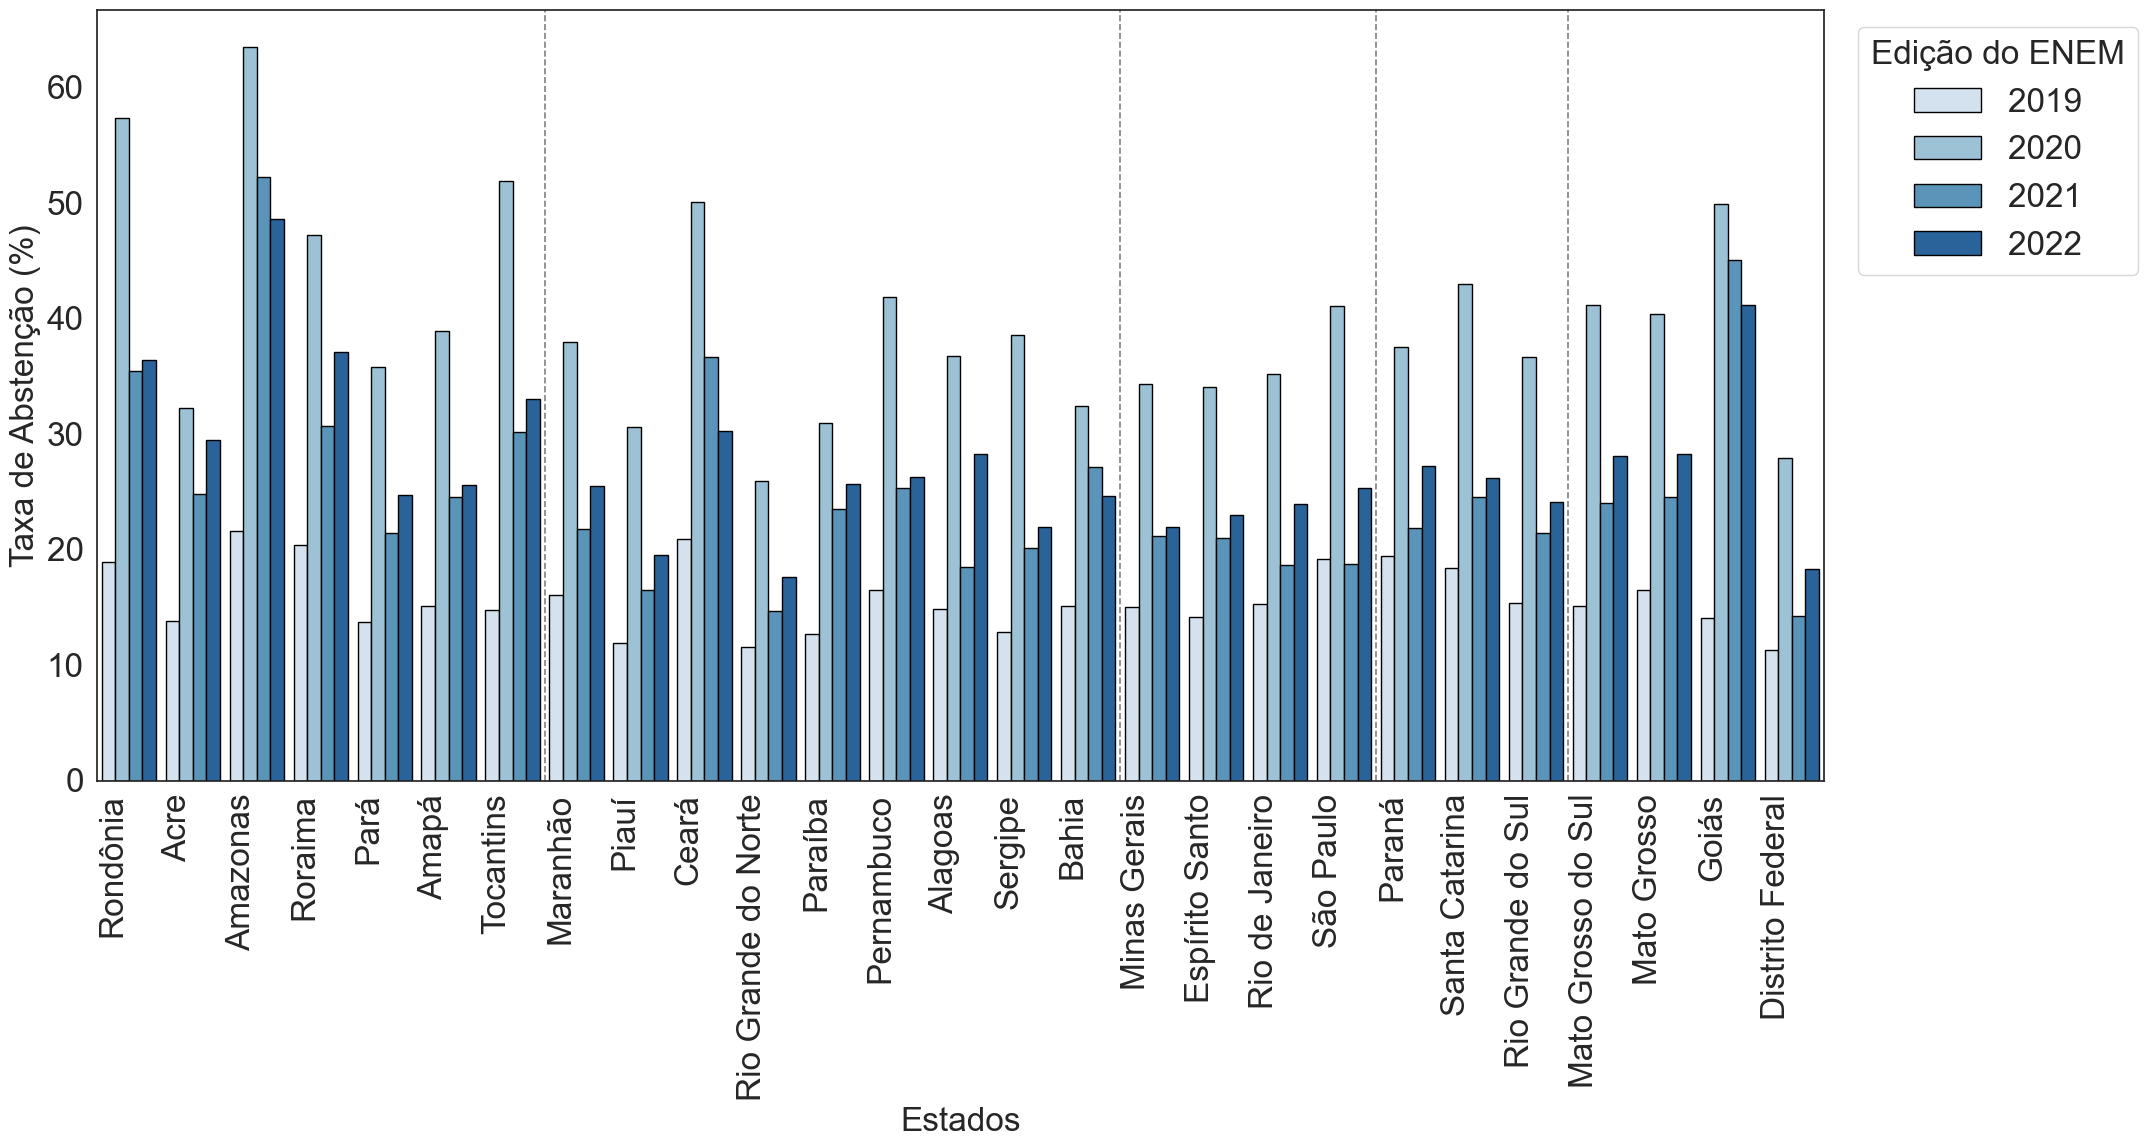

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar os dados
df = pd.read_csv('mapas/abstencao.csv')

# Dicionário mapeando códigos para nomes completos dos estados
estados = {
    11: 'Rondônia', 12: 'Acre', 13: 'Amazonas', 14: 'Roraima', 15: 'Pará', 16: 'Amapá', 17: 'Tocantins',
    21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 
    27: 'Alagoas', 28: 'Sergipe', 29: 'Bahia', 31: 'Minas Gerais', 32: 'Espírito Santo', 33: 'Rio de Janeiro', 
    35: 'São Paulo', 41: 'Paraná', 42: 'Santa Catarina', 43: 'Rio Grande do Sul', 50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 52: 'Goiás', 53: 'Distrito Federal'
}

# Regiões para separação visual
regioes = {
    'Norte': [11, 12, 13, 14, 15, 16, 17],
    'Nordeste': [21, 22, 23, 24, 25, 26, 27, 28, 29],
    'Sudeste': [31, 32, 33, 35],
    'Sul': [41, 42, 43],
    'Centro-Oeste': [50, 51, 52, 53]
}

# Mapear código para nome de estado e região
df['Estado'] = df['CD_UF'].map(estados)

# Extrair colunas do segundo dia
colunas_abstencao = [col for col in df.columns if 'Second day - ENEM' in col]

# Long format
df_long = pd.melt(
    df,
    id_vars=['Estado'],
    value_vars=colunas_abstencao,
    var_name='Ano',
    value_name='Taxa de Abstenção'
)

df_long['Ano'] = df_long['Ano'].str.extract(r'(\d{4})')
df_long = df_long.dropna(subset=['Taxa de Abstenção'])

# Ordenar os estados por região
ordem_estados = []
for lista in regioes.values():
    ordem_estados.extend([estados[uf] for uf in lista])

df_long['Estado'] = pd.Categorical(df_long['Estado'], categories=ordem_estados, ordered=True)

# Estilo visual
sns.set_theme(style="white", font="serif")
plt.rcParams.update({
    "font.size": 24,
    "font.family": "Arial"
})

# Criar figura
plt.figure(figsize=(22, 12))
ax = sns.barplot(
    data=df_long,
    x='Estado',
    y='Taxa de Abstenção',
    hue='Ano',
    palette="Blues",
    width=0.85,
    edgecolor='black'
)

# Eixos
plt.xlabel('Estados', fontsize=24)
plt.ylabel('Taxa de Abstenção (%)', fontsize=24)
plt.xticks(rotation=90, ha='right', fontsize=24)
plt.yticks(fontsize=24)

# Legenda fora
plt.legend(
    title='Edição do ENEM',
    fontsize=24,
    title_fontsize=24,
    loc='upper left',
    bbox_to_anchor=(1.01, 1), 
)

# Adicionar linhas verticais entre regiões
separadores = [len(regioes['Norte']),
               len(regioes['Norte']) + len(regioes['Nordeste']),
               len(regioes['Norte']) + len(regioes['Nordeste']) + len(regioes['Sudeste']),
               len(regioes['Norte']) + len(regioes['Nordeste']) + len(regioes['Sudeste']) + len(regioes['Sul'])]

for sep in separadores:
    ax.axvline(x=sep - 0.5, color='gray', linestyle='--', linewidth=1.2)

# Ajustar layout e salvar
plt.tight_layout()
plt.savefig('abstencao_estados_enem.png', dpi=300, bbox_inches='tight')
plt.show()

# MesoRegiões

In [ ]:
# Lista de anos (ex: ['19', '20', '21', '22'])
anos = ['19', '20', '21', '22']

# Função para calcular percentual de faltosos
def percentagem(total, faltosos):
    return 100 * (faltosos / total)

# Carregar mapeamento de município para mesorregião
mesorregiao_df = pd.read_csv('mapas/MesoRegião.csv')
mesorregiao_df.set_index('CO_MUNICIPIO_ESC', inplace=True)

# Listas para armazenar resultados por ano
resultados_pr = []
resultados_se = []

for ano in anos:
    print(f"Processando dados do ENEM 20{ano}...")

    # Caminho do microdados
    caminho = f"E:/dataset/enem/microdados_enem_20{ano}/DADOS/dados_enem_20{ano}.csv"

    # Carregar apenas colunas necessárias
    colunas = ['CO_UF_ESC', 'CO_MUNICIPIO_ESC', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_CN', 'TP_PRESENCA_MT']
    dados = pd.read_csv(caminho, sep=';', usecols=colunas)

    # Filtrar apenas alunos do estado do Pará (UF = 15)
    dados = dados[dados['CO_UF_ESC'] == 15]

    # Faltosos por dia
    faltosos_pr = dados[
        (dados['TP_PRESENCA_CH'] == 'Faltou à prova') | (dados['TP_PRESENCA_LC'] == 'Faltou à prova')
    ]
    faltosos_se = dados[
        (dados['TP_PRESENCA_CN'] == 'Faltou à prova') | (dados['TP_PRESENCA_MT'] == 'Faltou à prova')
    ]

    # Total de inscritos por município
    total_pr = dados[['CO_MUNICIPIO_ESC']].copy()
    total_se = dados[['CO_MUNICIPIO_ESC']].copy()

    # Contar faltosos e totais por município
    faltosos_pr_cont = faltosos_pr['CO_MUNICIPIO_ESC'].value_counts().rename('Faltosos_PR')
    faltosos_se_cont = faltosos_se['CO_MUNICIPIO_ESC'].value_counts().rename('Faltosos_SE')
    total_pr_cont = total_pr['CO_MUNICIPIO_ESC'].value_counts().rename('Total_PR')
    total_se_cont = total_se['CO_MUNICIPIO_ESC'].value_counts().rename('Total_SE')

    # Juntar em um único DataFrame por município
    df_merged = pd.concat([faltosos_pr_cont, faltosos_se_cont, total_pr_cont, total_se_cont], axis=1).fillna(0)

    # Juntar com mesorregião
    df_merged = df_merged.join(mesorregiao_df, how='left')

    # Agrupar por mesorregião
    df_meso = df_merged.groupby('CD_MESO').sum()

    # Calcular percentual de faltosos
    df_meso[f'First day of the 20{ano} exam'] = percentagem(df_meso['Total_PR'], df_meso['Faltosos_PR'])
    df_meso[f'Second day of the 20{ano} exam'] = percentagem(df_meso['Total_SE'], df_meso['Faltosos_SE'])

    # Manter apenas as colunas finais
    resultados_pr.append(df_meso[[f'First day of the 20{ano} exam']])
    resultados_se.append(df_meso[[f'Second day of the 20{ano} exam']])

# Concatenar todos os anos em um único DataFrame final
df_final = pd.concat(resultados_pr + resultados_se, axis=1)

# Salvar CSV final
df_final.to_csv('mapas/mesoregiao_pa_2.csv', sep=',')

print("Processamento concluído!")

Processando dados do ENEM 2019...


C:\Users\sandi\AppData\Local\Temp\ipykernel_31988\2150264935.py:54: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_meso = df_merged.groupby('CD_MESO').sum()


Processando dados do ENEM 2020...


## Tratamento de shp

In [ ]:
# === 1. Carregar shapefiles com geopandas ===
# Estados do Brasil (IBGE - 2021)
mapa_estados = gpd.read_file('mapas/BR_UF_2021.zip')

# Mesorregiões do Pará (IBGE - 2021)
mapa_para = gpd.read_file('mapas/PA_Mesorregioes_2021.zip')

# Verificar rapidamente os nomes das colunas (opcional)
# print(mapa_estados.columns)
# print(mapa_para.columns)

# === 2. Carregar base de dados da abstenção ===
dados_abstencao = pd.read_csv('mapas/abstencao.csv')

# Garantir que o código do estado (CD_UF) seja string, para merge posterior
dados_abstencao['CD_UF'] = dados_abstencao['CD_UF'].astype(str)

# Se quiser garantir que o código tenha 2 dígitos (ex: '05', '15', etc.)
dados_abstencao['CD_UF'] = dados_abstencao['CD_UF'].str.zfill(2)

# Opcional: exibir as primeiras linhas
# print(dados_abstencao.head())

In [ ]:
dados_abstencao.columns

In [39]:
def merge_mapa_abstencao(mapa_uf: gpd.GeoDataFrame, df_abstencao: pd.DataFrame, ano: str) -> gpd.GeoDataFrame:
    """
    Junta o GeoDataFrame dos estados com as taxas médias de abstenção por UF para um ano específico do ENEM.

    Parâmetros:
    - mapa_uf: GeoDataFrame com geometria dos estados.
    - df_abstencao: DataFrame com abstenções por 'CD_UF' e colunas no formato 'First day - ENEM XXXX'.
    - ano: Ano como string (ex: '2020').

    Retorna:
    - GeoDataFrame contendo as colunas de abstenção e a geometria por estado.
    """
    # Define nomes reais das colunas conforme seu DataFrame
    colunas = [f'First day - ENEM {ano}', f'Second day - ENEM {ano}']

    # Verificação de existência das colunas
    for col in colunas:
        if col not in df_abstencao.columns:
            raise KeyError(f"Coluna '{col}' não encontrada em df_abstencao.")

    # Agrupamento por UF
    df_media = (
        df_abstencao
        .groupby('CD_UF')[colunas]
        .mean()
        .reset_index()
    )

    # Merge com mapa
    mapa_merged = mapa_uf.merge(df_media, on='CD_UF', how='left')

    return mapa_merged

mapa_uf_2019 = merge_mapa_abstencao(mapa_estados, dados_abstencao, '2019')
mapa_uf_2020 = merge_mapa_abstencao(mapa_estados, dados_abstencao, '2020')
mapa_uf_2021 = merge_mapa_abstencao(mapa_estados, dados_abstencao, '2021')
mapa_uf_2022 = merge_mapa_abstencao(mapa_estados, dados_abstencao, '2022')

In [41]:
mapa_uf_2019.to_excel('mapas/mapa_2019.xlsx', sheet_name='data', index=False)
mapa_uf_2020.to_excel('mapas/mapa_2020.xlsx', sheet_name='data', index=False)
mapa_uf_2021.to_excel('mapas/mapa_2021.xlsx', sheet_name='data', index=False)
mapa_uf_2022.to_excel('mapas/mapa_2022.xlsx', sheet_name='data', index=False)

# Mesoregiões do Pará.

In [42]:
# Carregar o CSV com dados por mesorregião do Pará
dat = pd.read_csv('mapas/mesoregiao_pa_2.csv')

# Garantir que o código da mesorregião esteja em formato string com preenchimento de zeros à esquerda
dat['CD_MESO'] = dat['CD_MESO'].astype(str).str.zfill(4)

# Verificar resultado (opcional)
# print(dat.dtypes)
# print(dat.head())

In [43]:
def merge_mapa_mesorregiao(mapa_meso: gpd.GeoDataFrame, df: pd.DataFrame, ano: str) -> gpd.GeoDataFrame:
    """
    Junta o mapa de mesorregiões com os dados médios de abstenção por CD_MESO para um ano específico.

    Parâmetros:
    - mapa_meso: GeoDataFrame com geometria das mesorregiões.
    - df: DataFrame com abstenção por mesorregião, contendo coluna 'CD_MESO'.
    - ano: Ano como string (ex: '2019').

    Retorna:
    - GeoDataFrame combinado.
    """
    colunas = [f'First day of the {ano} exam', f'Second day of the {ano} exam']

    # Verificação de colunas
    for col in colunas:
        if col not in df.columns:
            raise KeyError(f"Coluna '{col}' não encontrada no DataFrame.")

    df_media = (
        df.groupby('CD_MESO')[colunas]
        .mean()
        .reset_index()
    )

    return mapa_meso.merge(df_media, on='CD_MESO', how='left')

mapa_meso_2019 = merge_mapa_mesorregiao(mapa_para, dat, '2019')
mapa_meso_2020 = merge_mapa_mesorregiao(mapa_para, dat, '2020')
mapa_meso_2021 = merge_mapa_mesorregiao(mapa_para, dat, '2021')
mapa_meso_2022 = merge_mapa_mesorregiao(mapa_para, dat, '2022')

C:\Users\sandi\miniconda3\envs\geo-env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


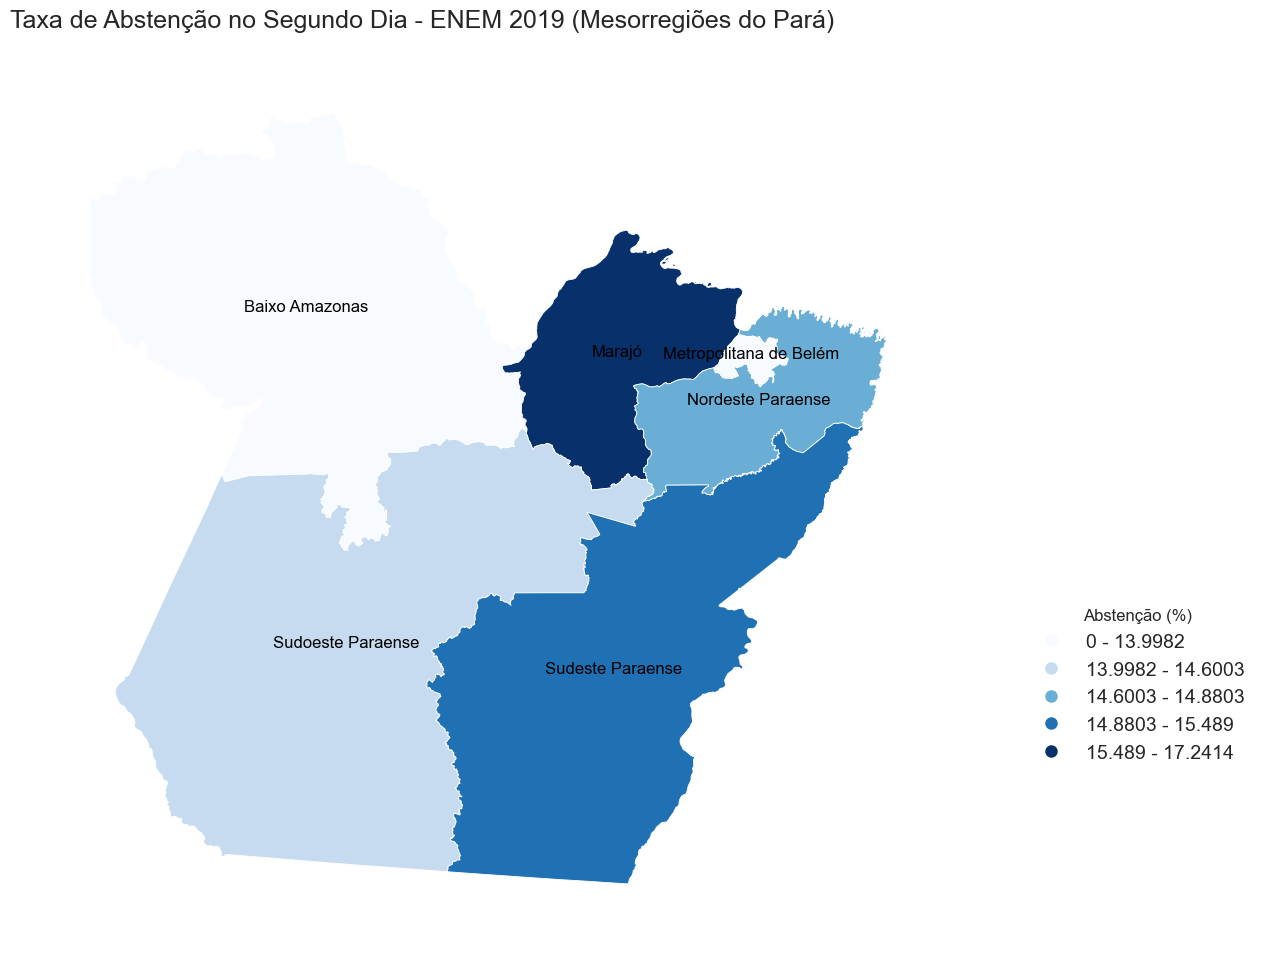

In [45]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import mapclassify
import warnings

# Suprimir aviso de geometria
warnings.filterwarnings("ignore", category=UserWarning, message="Geometry is in a geographic CRS.*")

# Criar figura e eixos
fig, ax = plt.subplots(figsize=(20, 10))

# Gerar esquema de classes (Quantis) com 5 grupos
scheme = mapclassify.Quantiles(mapa_meso_2019['Second day of the 2019 exam'], k=5)

# Criar mapa coroplético
gplt.choropleth(
    mapa_meso_2019,
    hue='Second day of the 2019 exam',
    cmap='Blues',
    legend=True,
    scheme=scheme,
    linewidth=0.6,
    edgecolor='white',
    legend_kwargs={
        'fontsize': 14,
        'bbox_to_anchor': (1.05, 0.4),
        'frameon': False,
        'title': 'Abstenção (%)'
    },
    ax=ax
)

# Adicionar nomes das mesorregiões no centro de cada polígono
mapa_meso_2019['centroid'] = mapa_meso_2019.geometry.centroid
for _, row in mapa_meso_2019.iterrows():
    ax.annotate(
        text=row['NM_MESO'],
        xy=(row['centroid'].x, row['centroid'].y),
        fontsize=12,
        ha='center',
        color='black'
    )

# Título
ax.set_title('Taxa de Abstenção no Segundo Dia - ENEM 2019 (Mesorregiões do Pará)', fontsize=18, loc='left')
ax.axis('off')

plt.tight_layout()
plt.savefig("mapa_abstencao_meso_2019.png", dpi=300, bbox_inches='tight')
plt.show()

C:\Users\sandi\miniconda3\envs\geo-env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


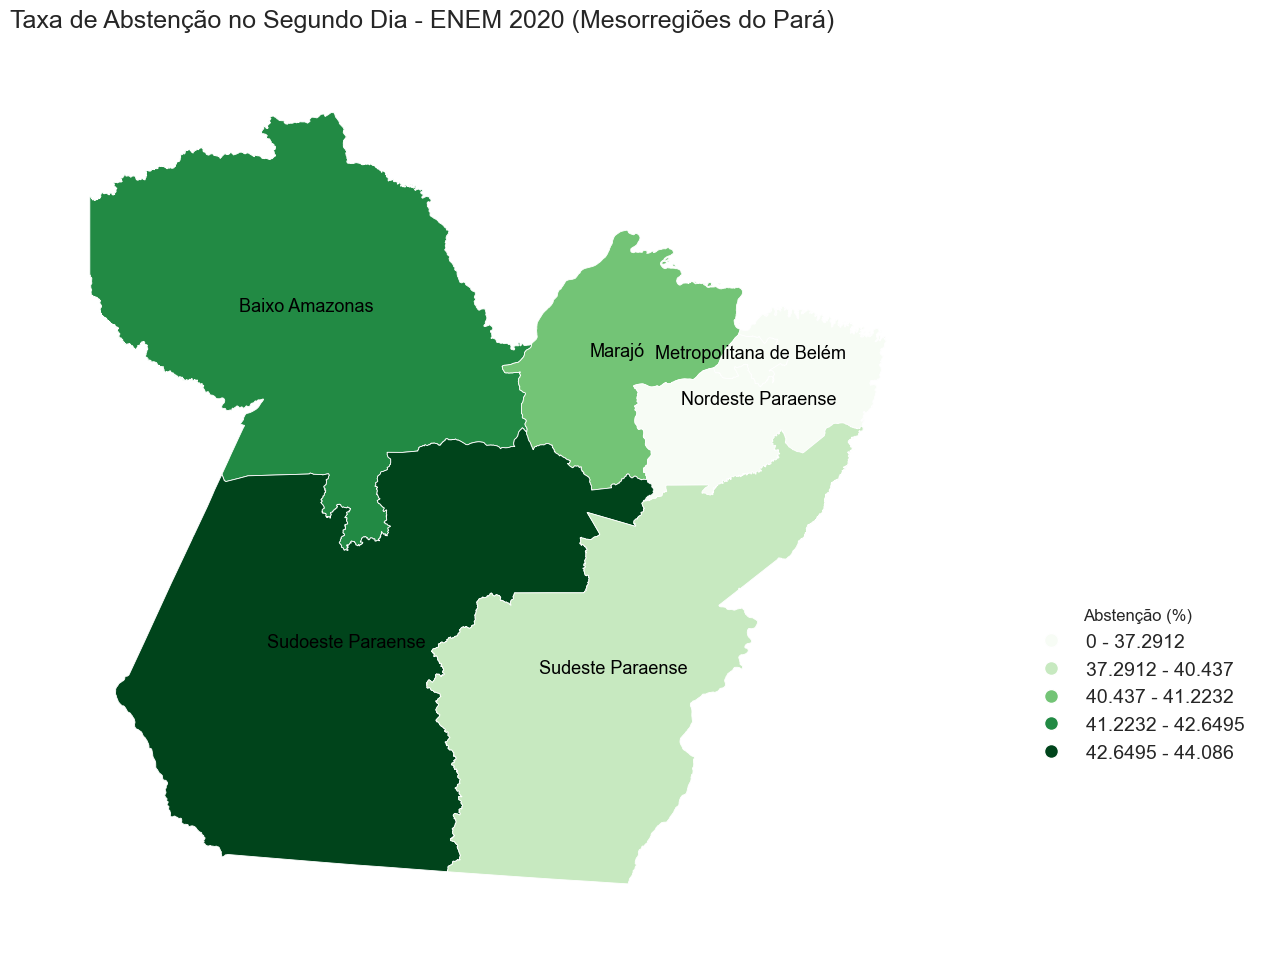

In [46]:
# Suprimir aviso de centroid com CRS geográfico (WGS84)
warnings.filterwarnings("ignore", category=UserWarning, message="Geometry is in a geographic CRS.*")

# === 1. Criar esquema de cores por quantis (com os próprios dados!)
scheme = mc.Quantiles(mapa_meso_2020['Second day of the 2020 exam'], k=5)

# === 2. Criar figura e eixos
fig, ax = plt.subplots(figsize=(20, 10))

# === 3. Mapa coroplético
gplt.choropleth(
    mapa_meso_2020,
    hue='Second day of the 2020 exam',
    cmap='Greens',
    scheme=scheme,
    edgecolor='white',
    linewidth=0.6,
    legend=True,
    legend_kwargs={
        'fontsize': 14,
        'bbox_to_anchor': (1.05, 0.4),
        'frameon': False,
        'title': 'Abstenção (%)'
    },
    ax=ax
)

# === 4. Adicionar rótulos das mesorregiões
# Calcular centroid para anotar
mapa_meso_2020['centroid'] = mapa_meso_2020.geometry.centroid
for _, row in mapa_meso_2020.iterrows():
    ax.annotate(
        row['NM_MESO'],
        xy=(row['centroid'].x, row['centroid'].y),
        fontsize=13,
        ha='center',
        color='black'
    )

# === 5. Finalizações do gráfico
ax.set_title('Taxa de Abstenção no Segundo Dia - ENEM 2020 (Mesorregiões do Pará)', fontsize=18, loc='left')
ax.axis('off')
plt.tight_layout()
plt.savefig('mapa_abstencao_meso_2020.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\sandi\miniconda3\envs\geo-env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


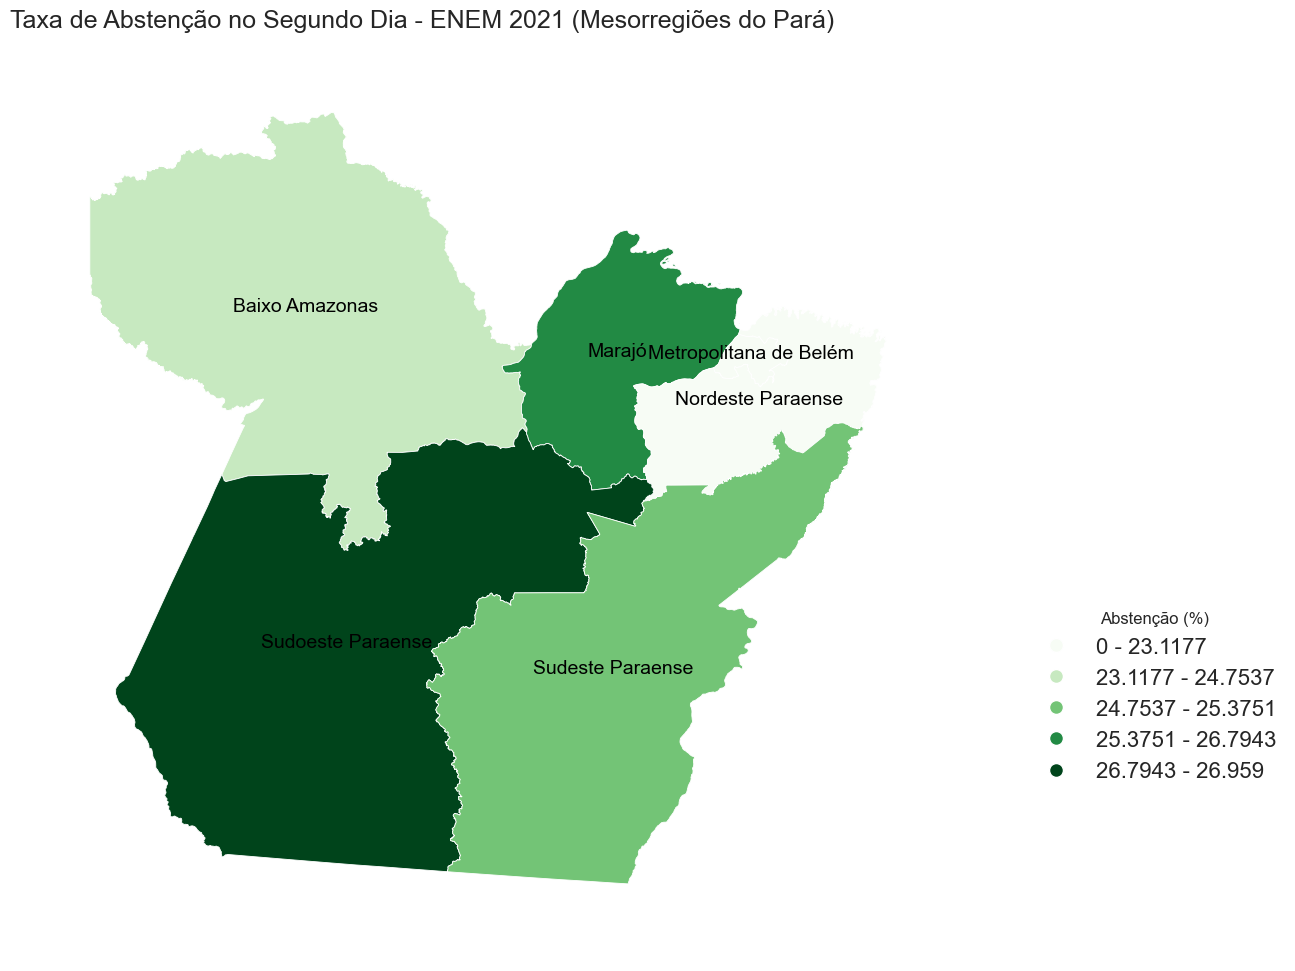

In [47]:
# Evita avisos de geometria com .centroid
warnings.filterwarnings("ignore", category=UserWarning, message="Geometry is in a geographic CRS.*")

# Calcular esquema de classes com os próprios dados (não lista fixa!)
scheme = mc.Quantiles(mapa_meso_2021['Second day of the 2021 exam'], k=5)

# Criar figura
fig, ax = plt.subplots(figsize=(20, 10))

# Mapa coroplético
gplt.choropleth(
    mapa_meso_2021,
    hue='Second day of the 2021 exam',
    cmap='Greens',
    legend=True,
    scheme=scheme,
    edgecolor='white',
    linewidth=0.6,
    legend_kwargs={
        'fontsize': 16,
        'bbox_to_anchor': (1.05, 0.4),
        'frameon': False,
        'title': 'Abstenção (%)'
    },
    ax=ax
)

# Adicionar centróides para rótulos
mapa_meso_2021['centroid'] = mapa_meso_2021.geometry.centroid

for _, row in mapa_meso_2021.iterrows():
    ax.annotate(
        text=row['NM_MESO'],
        xy=(row['centroid'].x, row['centroid'].y),
        fontsize=14,
        ha='center',
        color='black'
    )

# Finalizações
ax.set_title('Taxa de Abstenção no Segundo Dia - ENEM 2021 (Mesorregiões do Pará)', fontsize=18, loc='left')
ax.axis('off')
plt.tight_layout()
plt.savefig('mapa_abstencao_meso_2021.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\sandi\miniconda3\envs\geo-env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


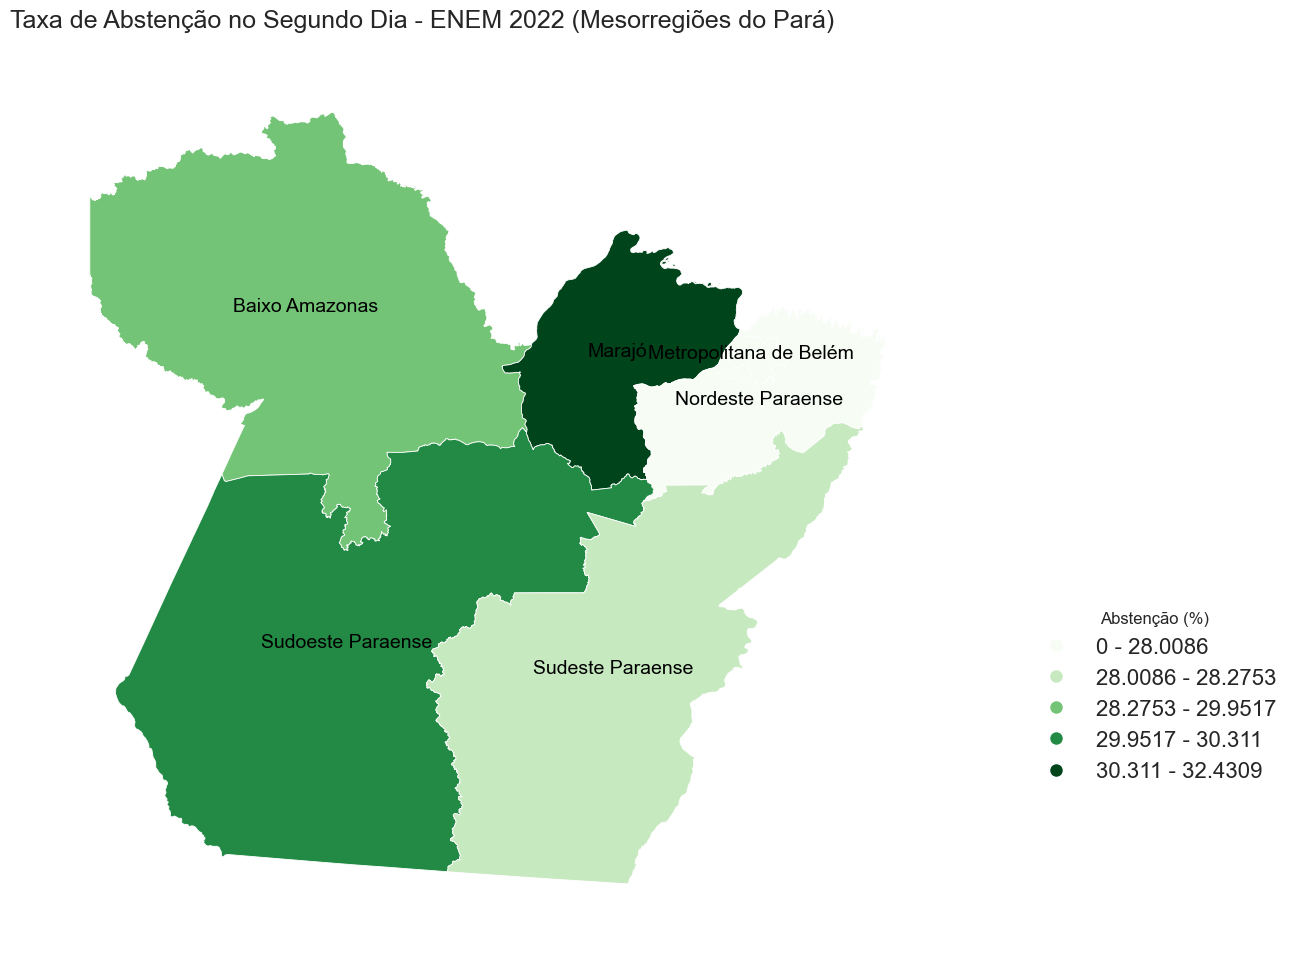

In [48]:
# Suprimir avisos do Shapely sobre centróides com CRS geográfico
warnings.filterwarnings("ignore", category=UserWarning, message="Geometry is in a geographic CRS.*")

# === 1. Gerar esquema de quantis com os dados reais
scheme = mc.Quantiles(mapa_meso_2022['Second day of the 2022 exam'], k=5)

# === 2. Criar figura e eixo
fig, ax = plt.subplots(figsize=(20, 10))

# === 3. Mapa coroplético
gplt.choropleth(
    mapa_meso_2022,
    hue='Second day of the 2022 exam',
    cmap='Greens',
    scheme=scheme,
    edgecolor='white',
    linewidth=0.6,
    legend=True,
    legend_kwargs={
        'fontsize': 16,
        'bbox_to_anchor': (1.05, 0.4),
        'frameon': False,
        'title': 'Abstenção (%)'
    },
    ax=ax
)

# === 4. Rótulos com centróides
mapa_meso_2022['centroid'] = mapa_meso_2022.geometry.centroid

for _, row in mapa_meso_2022.iterrows():
    ax.annotate(
        text=row['NM_MESO'],
        xy=(row['centroid'].x, row['centroid'].y),
        fontsize=14,
        ha='center',
        color='black'
    )

# === 5. Ajustes finais
ax.set_title('Taxa de Abstenção no Segundo Dia - ENEM 2022 (Mesorregiões do Pará)', fontsize=18, loc='left')
ax.axis('off')
plt.tight_layout()
plt.savefig('mapa_abstencao_meso_2022.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\sandi\miniconda3\envs\geo-env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
C:\Users\sandi\miniconda3\envs\geo-env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
C:\Users\sandi\miniconda3\envs\geo-env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
C:\Users\sandi\miniconda3\envs\geo-env\lib\site-packages\geoplot\geoplot.py:982: ShapelyDeprecati

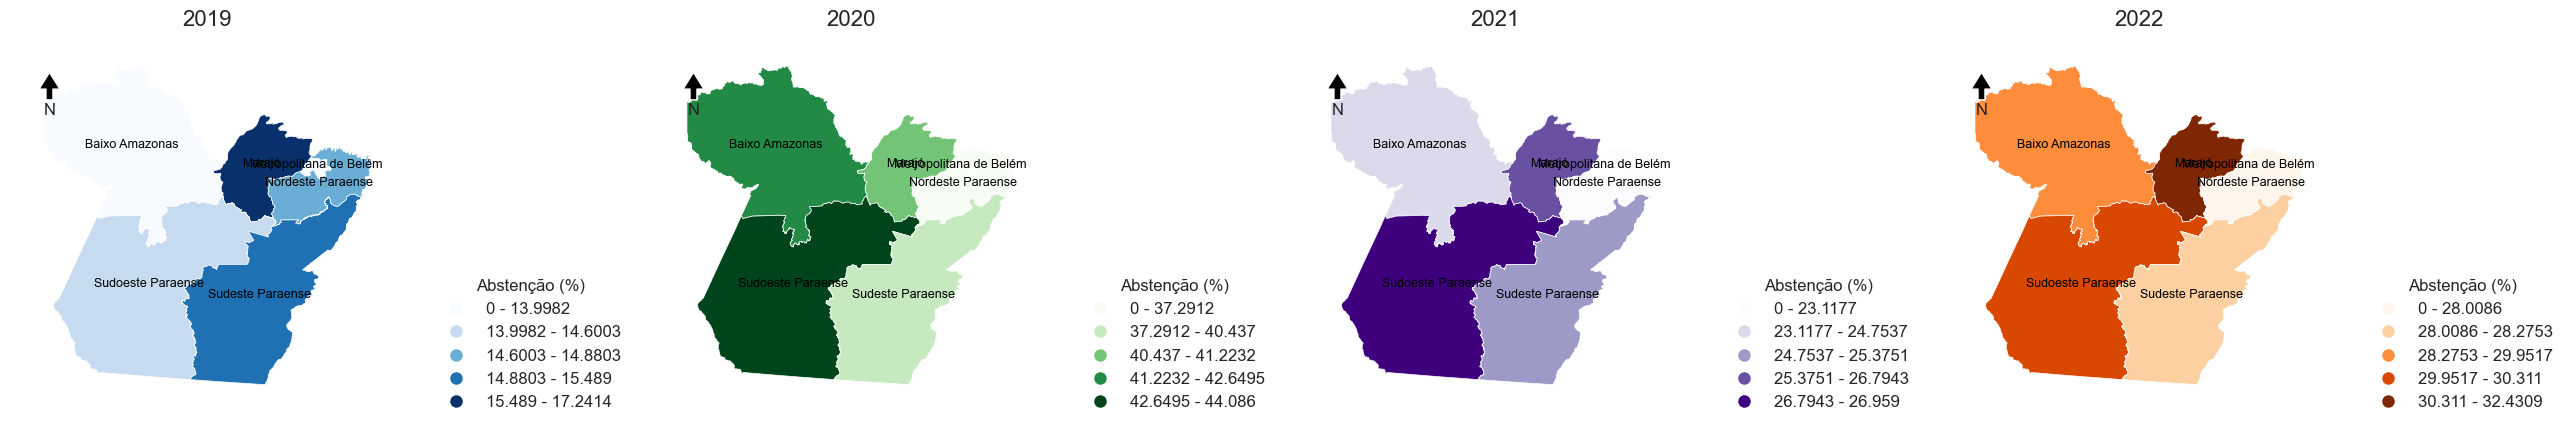

In [49]:
# Suprimir aviso de centróide em CRS geográfico
warnings.filterwarnings("ignore", category=UserWarning, message="Geometry is in a geographic CRS.*")

# Função para adicionar a bússola
def add_compass(ax, x=0.1, y=0.9):
    ax.annotate('N', xy=(x, y), xytext=(x, y - 0.1),
                arrowprops=dict(facecolor='black', width=5, headwidth=15),
                ha='center', va='center', fontsize=12, xycoords=ax.transAxes)

# Criar figura com 4 subplots lado a lado
fig, axes = plt.subplots(1, 4, figsize=(26, 8))

# Dados de anos, mapas e cores
anos = ['2019', '2020', '2021', '2022']
mapas = [mapa_meso_2019, mapa_meso_2020, mapa_meso_2021, mapa_meso_2022]
cores = ['Blues', 'Greens', 'Purples', 'Oranges']

for i, (ano, mapa, cor) in enumerate(zip(anos, mapas, cores)):
    col = f'Second day of the {ano} exam'
    
    # Calcular esquema real com os dados
    scheme = mc.Quantiles(mapa[col], k=5)

    # Plotar mapa
    gplt.choropleth(
        mapa,
        hue=col,
        cmap=cor,
        legend=True,
        scheme=scheme,
        edgecolor='white',
        linewidth=0.5,
        legend_kwargs={
            'fontsize': 12,
            'bbox_to_anchor': (1.05, 0.4),
            'frameon': False,
            'title': 'Abstenção (%)'
        },
        ax=axes[i]
    )

    # Adicionar rótulos
    mapa['centroid'] = mapa.geometry.centroid
    for _, row in mapa.iterrows():
        axes[i].annotate(
            row['NM_MESO'],
            xy=(row['centroid'].x, row['centroid'].y),
            fontsize=9,
            ha='center',
            color='black'
        )

    # Título e bússola
    axes[i].set_title(f'{ano}', fontsize=16, loc='center')
    axes[i].axis('off')
    add_compass(axes[i])

# Ajustar layout final
plt.tight_layout()
plt.savefig('mapas_abstencao_mesorregioes_2019_2022.png', dpi=300, bbox_inches='tight')
plt.show()